**0.0-test-installation**  (A.L. 2021-04-02)<br>

# Numpy, Pandas, Matplotlib, Statsmodels, Nibabel and more

If you successfully run through this notebook your Python environment is likely configured correctly. 

# How to use the Jupyter Notebook?

[Jupyter Notebook](http://jupyter.org/) is a useful tool for experimenting with code. Everything of code and text is written in HTML, Markdown og Python.

Use arrow keys to navigate between cells. Hit ENTER on a cell to swith to editing mode. ESC to get back. (Try now!)

In [1]:
print("This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. ")

This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. 


You can also run cells by typing **Shift+Enter** or **Ctrl+Enter**. Try running the cell above by using both of thes

You will find more information via the Help menu above.

BMED360 will use Jupyter for most of the coding, and you will acquire good Notebook skills through practise. Here is a good tutorial on Jupyter Notebook that is recommended:: [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

# Import libraries

These are libraries that will be frequently used in the course:

In [2]:
# To display plots directly in the notebook:
%matplotlib inline

In [3]:
# A frequently used plotting library:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# An extension of matplotlib generating nice(er) plots with small amount of code:
import seaborn as sns

In [5]:
# Library for numerical linear algebra (matrices and more) - the workhorse of numerical computing in Python:
import numpy as np

In [6]:
# To read, write and process tabular data - the workhorse of data analysis in Python:
import pandas as pd

In [7]:
# For machine learning:
import sklearn

In [8]:
# For medical imaging (more the neuro-imaging):
import nibabel

In [9]:
# Maschine learning for neuro-imaging:
import nilearn

In [10]:
# A library for statistics in python
import statsmodels

In [11]:
# For reading and writing images:
import imageio

In [12]:
# For advanced image processing:
import skimage

In [13]:
# For 3D plotting and mesh analysis (VTK-related)
import pyvista as pv

# Test libraries

**NB:** The aim here is to test your installation: (most of) the tools in place? <br>
Do not despair (or disappear) if you do not understand what is going on (at this stage).
It can be seen as a motivation and you will get to know during the course. 

## `Numpy`

In [14]:
import numpy as np

In [15]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [16]:
e = np.random.random((3,3))
e

array([[0.50281488, 0.17627084, 0.202079  ],
       [0.17051653, 0.43731638, 0.63201443],
       [0.52836224, 0.84714173, 0.09306092]])

## `matplotlib`: a simple plot

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

A figure displaying a [sine function](https://en.wikipedia.org/wiki/Sine):

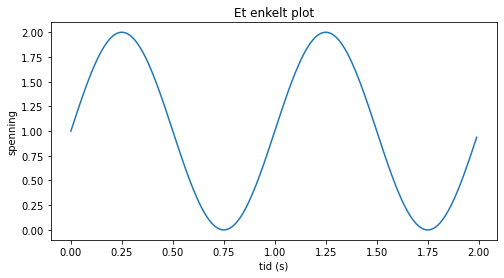

In [18]:
# Data to be plotted (generated by Numpy)
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Make a figure of specified size
f, ax = plt.subplots(figsize=(8,4))

# Plot t versus s
plt.plot(t, s)

# Add title and labels:
plt.title('Et enkelt plot')
plt.xlabel('tid (s)')
plt.ylabel('spenning')

# Show plot:
plt.show()

## `Seaborn`: a more advanced plot

In [19]:
import seaborn as sns

Source: [Link](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

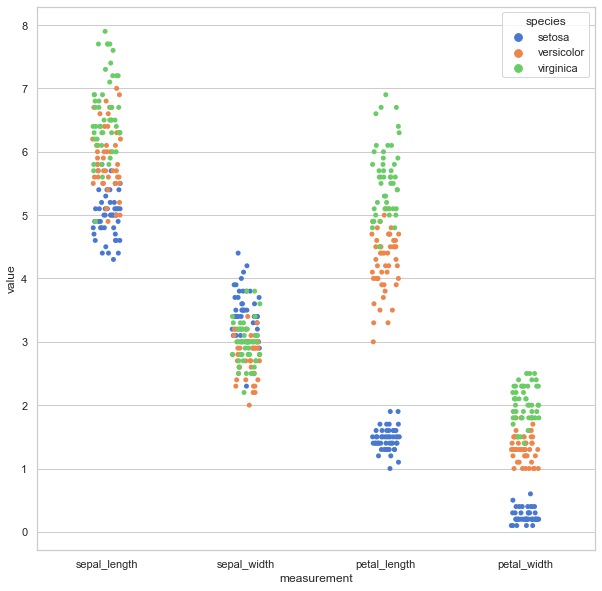

In [20]:
sns.set(style="whitegrid", palette="muted")

# Load the (famous) iris data set
iris = sns.load_dataset("iris")

# "Melt" data set to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Make a figure of specified size
f, ax = plt.subplots(figsize=(10,10))

# Draw a categorical scatterplot to show each observation
sns.stripplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)

plt.show()

## `Pandas`

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('./data/0.0-test_data.csv')

In [23]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


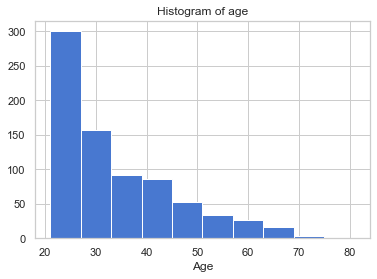

In [24]:
df['age'].hist()
plt.title("Histogram of age")
plt.xlabel("Age")
plt.show()

## `scikit-learn`: machine learning

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
data = datasets.load_breast_cancer()

In [27]:
X = data['data']
y = data['target']
features = data['feature_names']
labels = data['target_names']

In [28]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
print(labels)

['malignant' 'benign']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
rf = RandomForestClassifier(n_estimators=100)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
predictions = rf.predict(X_test)

In [34]:
accuracy_score(y_test, predictions) * 100

96.5034965034965

## `scikit-image`: Image processing in Python

Example from the <a href="http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_ihc_color_separation.html">scikit-image</a>-documentation: **Immunohistochemical staining colors separation**

In this example we separate the immunohistochemical (IHC) staining from the hematoxylin counterstaining. The separation is achieved with the method described in [1], known as “color deconvolution”.

The IHC staining expression of the FHL2 protein is here revealed with Diaminobenzidine (DAB) which gives a brown color.

[1] A. C. Ruifrok and D. A. Johnston, “Quantification of histochemical staining by color deconvolution”. _Anal Quant Cytol Histol_ 2001;23(4):291-299. [[link](https://pubmed.ncbi.nlm.nih.gov/11531144)]  [[PDF](http://helios.mi.parisdescartes.fr/~lomn/Data/2017/Color/Quantification_of_histochemical_staining.pdf)]

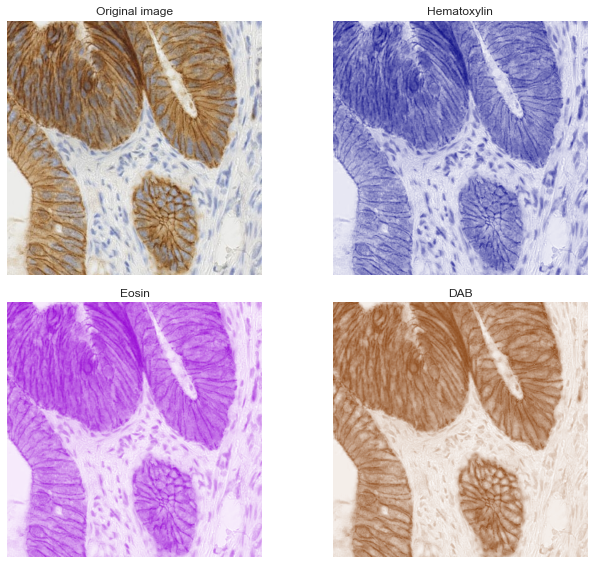

In [35]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white', 'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet', 'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(1-ihc_rgb[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_rgb[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(1-ihc_rgb[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Manipulation of the hematoxylin and DAB-«channels»:

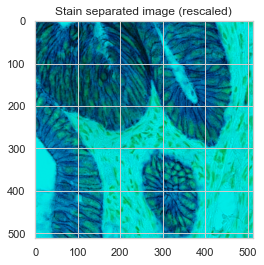

In [36]:
import numpy as np
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_rgb[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_rgb[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig, ax = plt.subplots()
ax.imshow(zdh)
ax.set_title("Stain separated image (rescaled)")
#ax.axis('off')
plt.show()

## `NiBabel` 

In [37]:
import nibabel as nib

In [38]:
img = nib.load('./data/0.0-test_nifti.nii.gz')
data = img.get_fdata()

In [39]:
data.dtype, img.shape, img.header.get_zooms()

(dtype('float64'), (256, 256, 150), (0.93749976, 0.93749994, 1.1999981))

In [40]:
len(np.unique(img.get_fdata())), np.unique(img.get_fdata()).min(), np.unique(img.get_fdata()).max().round(2) 

(894, 0.0, 2781.5)

In [41]:
from nibabel.viewers import OrthoSlicer3D

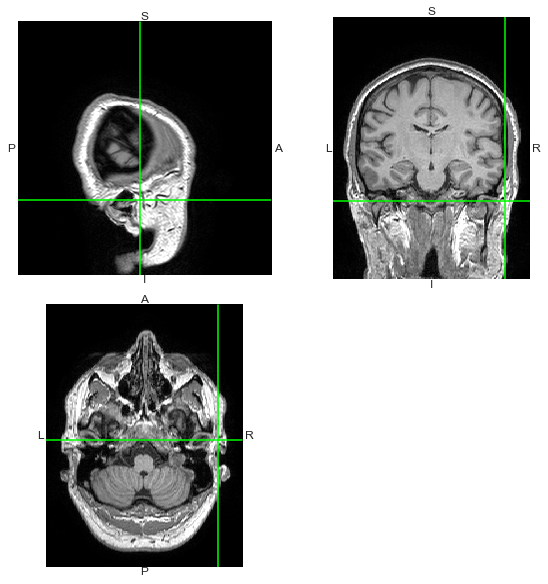

In [42]:
OrthoSlicer3D(img.get_fdata(), affine= img.affine).show()

In [43]:
# Resampimage to a voxel size of 2 x 2 x 2:
import nibabel.processing
voxel_size = [2, 2, 2]
resampled_img = nib.processing.resample_to_output(img, voxel_size)
image = resampled_img.get_fdata()
image = np.array(255*image/image.max(), dtype=np.uint8)

## [`PyVista`](https://www.pyvista.org) and `itkwidgets`

https://github.com/Kitware/ipyvtk-simple

In [44]:
from itkwidgets import view
# view?

In [45]:
#view(image)

In [46]:
import pyvista as pv

data = pv.wrap(image)
data

UniformGrid (0x7fb2fa04ed00)
  N Cells:	2025020
  N Points:	2074464
  X Bounds:	0.000e+00, 9.500e+01
  Y Bounds:	0.000e+00, 1.460e+02
  Z Bounds:	0.000e+00, 1.460e+02
  Dimensions:	96, 147, 147
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

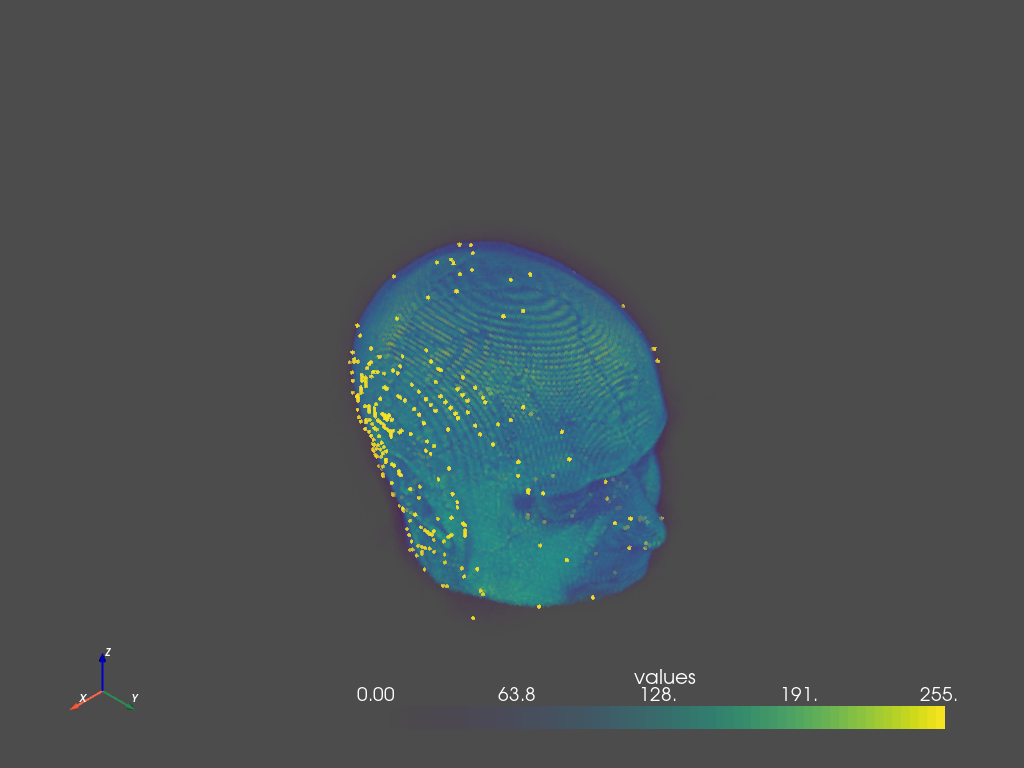

[(300.99986756511043, 326.49986756511043, 326.49986756511043),
 (47.5, 73.0, 73.0),
 (0.0, 0.0, 1.0)]

In [47]:
data.plot(volume=True) # Volume render

In [50]:
from ipyvtk_simple.viewer import iPlotter
#pl = pv.Plotter()
#p.add_mesh_clip_plane(data)
#p.show()

ModuleNotFoundError: No module named 'ipyvtk_simple'

## `Nilearn`: Neuroimaging i Python

In [ ]:
# To ignore an unimportant warning generated by the below code 
# (remove the filter if you're curious)
import warnings 
warnings.simplefilter('ignore')

In [ ]:
from nilearn import datasets, plotting
img = datasets.fetch_localizer_button_task()['tmap']
plotting.view_img_on_surf(img, threshold='90%', surf_mesh='fsaverage')

In [ ]:
from IPython.display import Image
Image(filename='./assets/view_img_on_surf.png', width=560)

## `imageio` : Python library for reading and writing image data

We read from disk a set of single-slice 4-channel MR-images in DICOM-format (we will use these image data later in the course)

In [ ]:
channels = ['FLASH', 'DESS', 'FISP', 'PSIF']
nb_channels = len(channels)

In [ ]:
images = [imageio.imread(f'./data/{channel.lower()}_060.dcm') for channel in channels] 

In [ ]:
nrow, ncol = images[0].shape

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

for i, im in enumerate(images):
    ax[i].imshow(im, cmap='gray')
    ax[i].set_title(channels[i])
    ax[i].axis('off')

plt.show()

In [ ]:
# Classes (color-coded): air, gm, wm, csf, fat, mus(cle)
train_mask = imageio.imread("./data/flash_060_training_mask_6cla.png")
roi_mask = imageio.imread("./data/flash_060_brain_mask.png")
print(train_mask.shape)

fig, axes = plt.subplots(1, 3, figsize=(10, 16), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(train_mask)
ax[0].set_title("Training mask - 6 classes")
ax[1].imshow(images[0], cmap='gray')
ax[1].set_title("FLASH")
ax[2].imshow(roi_mask)
ax[2].set_title("Brain ROI")
plt.show()

In [ ]:
# Number of occurences of each unique color (class label in training mask) in descending order
from collections import Counter
Counter([tuple(colors) for i in train_mask for colors in i]).most_common()

In [ ]:
# Count the number of occurences of oixels in ROI mask
Counter([tuple(colors) for i in roi_mask for colors in i]).most_common()

## `statsmodels`: Statistics in Python

See: https://www.statsmodels.org/devel/example_formulas.html

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Load data 
# (Table 6.3 in Dobson & Barnett, An Introduction to Generalized Linear Models, 2018, p.105)
carbohydrate = pd.read_csv('./data/carbohydrate_diet_dobson_tab_6_3.csv')
print(carbohydrate.info())
carbohydrate.head(5)

In [ ]:
# Define an ordinary least squares (OLS) regression model
model = 'carbohydrate ~ age + weight + protein'
print(model)

In [ ]:
# Fit the OLS regression model to the data
model_fit = smf.ols(model, data=carbohydrate).fit()

In [ ]:
# Inspect the results
model_fit.summary()

[1] [standard error](https://en.wikipedia.org/wiki/Standard_error), [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix); [2] [condition number](https://en.wikipedia.org/wiki/Condition_number), [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)

In [ ]:
print('Diagnostics for model:', model)

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

a) [residuals](https://en.wikipedia.org/wiki/Errors_and_residuals), b) [studentized](https://en.wikipedia.org/wiki/Studentization)

In [ ]:
pd.DataFrame({'Carbohydrate': carbohydrate['carbohydrate'],  
              'Fitted value': model_fit.fittedvalues, 
              'Residual': model_fit.resid,
              'Std_residual': model_norm_residuals}).round(4).head(20)

In [ ]:
# A diagnostic QQ-plot for the OLS model
# https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# Cf. Fig. 6.1 in Dobson & Barnett, 2018

a) [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

In [ ]:
QQ = sm.ProbPlot(model_norm_residuals, scale=1, )
QQ.qqplot(xlabel='Normal quantiles', ylabel='Standardized residuals', line='45')
plt.show()

In [ ]:
# A diagnostic plot for the OLS model
# https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
# Cf. Fig. 6.1 in Dobson & Barnett, 2018
fig, ax = plt.subplots()
plt.plot(model_fit.fittedvalues, model_norm_residuals, 'o')
plt.axhline(y=.0, color='k', linestyle='--')
ax.set_xlabel('Fitted carbohydrate')
# plt.xticks(np.arange(0, carbohydrate.shape[0], step=5))
ax.set_ylabel('Standardized residuals')
plt.show()

In [ ]:
# Cook's distance - A measure of influential observations (those that have relatively 
# large effect on inferences based on the model) obtained from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

a) [Cook's distance](https://en.wikipedia.org/wiki/Cook%27s_distance)

In [ ]:
# Cf. Fig. 6.1 in Dobson & Barnett, 2018
fig, ax = plt.subplots()
plt.plot(model_cooks, 'o')
ax.set_xlabel('Order of observation')
plt.xticks(np.arange(0, carbohydrate.shape[0], step=5))
ax.set_ylabel('Cook''s distance')
plt.show()

See also: NeuroPycon: An open-source python toolbox for fast multi-modal and reproducible brain connectivity pipelines (https://www.sciencedirect.com/science/article/pii/S1053811920305061)